<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-280 Estadística Computacional I-2020 </h1>

<H3 align='center'> Tema 1 - Análisis Exploratorio de Datos  </H3>
<H3 align='center'> Nombre: Lucio Fondón Rebolledo </H3>
<H3 align='center'> Rol: 201773610-0 </H3>
<H3 align='center'> Paralelo: 201 </H3>



<hr style="height:2px;border:none"/>


### **Formalidades**  
* Por favor trabaje individualmente. Es posible utilizar apuntes, libros, papers, ejemplos y cualquier otro material que desee de internet, pero debe ser usted quien desarrolle los ejercicios y comente los resultados en el notebook que entregará. Compórtese como si estuviese haciendo un certámen tradicional con acceso a apuntes.
* Puede utilizar Python o R. En ambos casos, no puede usar funciones estadísticas específicas, excepto aquellas correspondientes al cálculo de medidas de tendencia ó dispersión (media, desviación estándar, etc) y aquellas correspondientes al cálculo de probabilidades y percentiles sobre las distribuciones revisadas en clases (pnorm, qnorm, pt, qt), etc.
* Además del notebook, debe entregar un video explicando lo que hizo, paso a paso, como en los ejemplos entregados en AULA. El video puede ser subido a plataforma como GitHub, Youtube, Google Drive, ó Dropbox.

### **Entrega**
* **Formato**: Sus respuestas deben ser entregadas en forma de Jupyter notebook en conjunto con un video explicativo de 10 a 20 minutos
* **Plataforma**: A través de **Aula** (para el vídeo se aconseja subir un link a plataforma auxiliar como Drive/Dropbox/Youtube). 
* **Fecha límite**: Viernes 24 Abril a las 23:59 hrs.

<hr style="height:2px;border:none"/>

## Enunciado
Una empresa que vende zapatillas requiere su asistencia para estudiar sus ventas históricas por día. Los datos que la empresa tiene disponibles son el número de ventas del año ya transcurrido (2019), separados en dos muestras, una con las ventas asociadas a los días de la semana (Lunes a Viernes), $D_{sem}$, y la otra con las ventas asociadas a los fines de semana (Sábado y Domingo), $D_{fin}$. *Es claro que $|D_{fin} | < | D_{sem}|$*. La empresa sospecha que las ventas de los fines de semana tiene un comportamiento distinto al de la semana, por ello la separación. Los ejecutivos no saben qué técnicas usar para hacer el estudio correspondiente, por lo que se le solicita a usted realizar el correspondiente estudio. 

Los datos pueden ser descargados a través del siguiente link: __[Dsem](https://raw.githubusercontent.com/FMena14/ML_usm/master/Estadisticia/T1_data/daily_sales_week.csv)__, __[Dfin](https://raw.githubusercontent.com/FMena14/ML_usm/master/Estadisticia/T1_data/daily_sales_weekend.csv)__. Cada fila corresponde a un dato (un día) el cual contiene las ventas asociadas a ese día. Para otorgar anonimidad, la información del día fue extraído.

*Para descargar los datos en Jupyter puede ejecutar*
```
!wget https://raw.githubusercontent.com/FMena14/ML_usm/master/Estadisticia/T1_data/daily_sales_week.csv
!wget https://raw.githubusercontent.com/FMena14/ML_usm/master/Estadisticia/T1_data/daily_sales_weekend.csv
```

### Actividades
> a) [5 pts] Describa la población del fenómeno aleatorio de estudio, la variable asociada y las dos muestras a trabajar.

> b) [10 pts] Compare las ventas de cada conjunto/muestra a través de los puntos centrales de tendencia (media y mediana) ¿Encuentra razonable los resultados de las ventas de cada conjunto? ¿Por qué? ¿Qué indica el sesgo?

> c) [15 pts] ¿La distribución entre ambos conjuntos/muestras varía? Analice y compare a través de la dispersión presente usando la desviación estándar (*recuerde utilizar una precisión decimal más que los datos)* ¿Qué indica lo observado? ¿Cómo se podría complementar el análisis?

> d) [20 pts] Grafique el boxplot de cada muestra y compare ¿Existe evidencia suficiente para concluir que en el fin de semana se venden más que los días semanales? Si se considera un día exitoso como el que se venden más de 15 productos ¿Cuál es el porcentaje aproximado de días exitoso en cada muestra?

> e) [20 pts] La empresa quiere invertir recursos para aumentar el número de ventas y tener más días exitosos, aplicando técnicas como mejor publicidad, aumento de personal, cambio en los horarios, entre otros. El problema es que no cuenta con el suficiente dinero, por lo que debe elegir entre enfocarse en los días semanales **o** los fines de semana. En base al estudio realizado ¿Dónde recomendaría invertir recursos para aumentar el número de ventas? ¿Por qué?

> f) [30 pts] Verifique si es válido juntar los dos conjuntos en uno solo que contenga las ventas de la tienda en la temporada $D_{temp} = D_{sem} \cup D_{fin}$. Complemente su análisis con un histograma de la muestra $D_{temp}$, escoja un valor de $K$ apropiado. ¿Las medidas de tendencia y dispersión calculadas anteriormente se mantienen sobre $D_{temp}$? ¿Los nuevos valores se corresponden con un promedio entre las medidas individuales calculadas sobre cada muestra? ¿Cómo se puede obtener la media muestral de $D_{temp}$ a través de la media muestral de $D_{sem}$ y $D_{fin}$? 

### Desarrollo



### Pregunta a)

>Fenómento aleatorio -> Venta de zapatillas de una empresa.

>Población -> Conjunto del número de todas las ventas de zapatilas.

>Muestra 1 -> Número de ventas que se han realizado durante los días de semana.

>Muestra 2 -> Número de ventas que se han realizado durante los fines de semana.

>Variable -> Cantidad de zapatillas vendidas durante un día, x.



Antes que nada, descargaremos los archivos .csv correspondientes

In [55]:
import wget
url_week = "https://raw.githubusercontent.com/FMena14/ML_usm/master/Estadisticia/T1_data/daily_sales_week.csv"
url_weekend = "https://raw.githubusercontent.com/FMena14/ML_usm/master/Estadisticia/T1_data/daily_sales_weekend.csv"

file_week = wget.download(url_week)
file_weekend = wget.download(url_weekend)

100% [..................................................................................] 297 / 297

### Pregunta b)



In [56]:
import pandas as pd
import numpy as np
df_week = pd.read_csv(file_week,header=None)
df_weekend = pd.read_csv(file_weekend,header=None)

#sacamos media y mediana de las ventas de la semana y fin de semana
media_week = np.mean(df_week.values)
media_weekend = np.mean(df_weekend.values)

print("La media de las ventas de los días de semana es: " +str(media_week))
print("La media de las ventas de los fines de semana es: " +str(media_weekend))

mediana_week = np.median(df_week.values)
mediana_weekend = np.median(df_weekend.values)

print("La mediana de las ventas de los días de semana es: " +str(mediana_week))
print("La mediana de las ventas de los fines de semana es: " +str(mediana_weekend))

#calculamos sesgo
sesgo_week = media_week - mediana_week
sesgo_weekend = media_weekend - mediana_weekend
print("El sesgo de las ventas de los días de semanas es: " +str(sesgo_week))
print("El sesgo de las ventas de los días de fin de semana es: " +str(sesgo_weekend))


La media de las ventas de los días de semana es: 4.593869731800766
La media de las ventas de los fines de semana es: 14.73076923076923
La mediana de las ventas de los días de semana es: 3.0
La mediana de las ventas de los fines de semana es: 14.0
El sesgo de las ventas de los días de semanas es: 1.5938697318007664
El sesgo de las ventas de los días de fin de semana es: 0.73076923076923


Según los datos encontrados anteriormente, podemos notar que en ambas de las muestras se encuentran resultados esperables, dado que, por ejemplo, al ser menos días de fin de semana, se esperaba que se vendieran más productos esos días que en los días de semana, dado que deben distribuirse en más días que el fin de semana. En las dos muestras, el sesgo resultó ser positivo, esto indica que son muy parecidas entre sí las respectivas medias y medianas de cada muestra, siendo el sesgo de los días de la semana más asimétricamente positivo que el de los fines de semana.

### Pregunta c)


In [57]:
de_week = np.round(np.std(df_week.values,ddof=1),1)
de_weekend = np.round(np.std(df_weekend.values,ddof=1),1)

print("La desviación estándar de las ventas de los días de semanas es: " +str(de_week))
print("La desviación estándar de las ventas de los fines de semanas es: " +str(de_weekend))


La desviación estándar de las ventas de los días de semanas es: 5.2
La desviación estándar de las ventas de los fines de semanas es: 5.3


Según lo calculado anteriormente con la desviación estándar, se puede notar que cada muestra presenta una dispersión entre los datos del dataset y la respectiva media muestral, siendo la desviación estándar de la ventas de los fines de semana ligeramente mayor a la de venta durante los días de semana. Creo que yo que no es tan fácil concluir mucho con la desviación estándar en este caso, dado que dieron casi similares, y éste análisis podría complementarse más con una visualización de los datos estudiados, ya sea en histograma o en diagrama de caja-bigotes.



### Pregunta d)


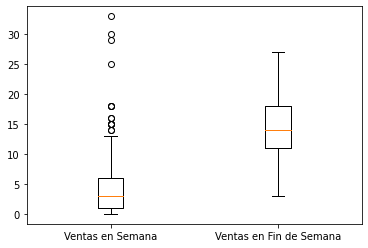

In [58]:
import matplotlib.pyplot as plt

plt.boxplot([df_week.values,df_weekend.values])
plt.xticks([1,2],["Ventas en Semana", "Ventas en Fin de Semana"])
plt.show()

In [59]:
#Cálculo de día con ventas >= 15 muestra semana
cont = 0
for i in range(len(df_week.values)):
    if df_week.values[i] >= 15:
        cont+=1
        
print("El porcentaje de días de ventas exitosos en los días de semana son: " +str(np.round(100*cont/len(df_week.values))) +"%")

#Cálculo de día con ventas >= 15 muestra fin de semana
cont = 0
for i in range(len(df_weekend.values)):
    if df_weekend.values[i] >= 15:
        cont+=1
print("El porcentaje de días de ventas exitosos en los días de fin de semana son: " +str(np.round(100*cont/len(df_weekend.values)))+"%")


El porcentaje de días de ventas exitosos en los días de semana son: 5.0%
El porcentaje de días de ventas exitosos en los días de fin de semana son: 48.0%


Observando el gráfico de las dos boxplot, podemos notar que las dos cajas están muy poco sobrepuestas y bastantes alejadas entre sí, por lo que se pueden encontrar varias diferencias significativas entre éstas. El boxplot de las ventas en los días de semana además contiene varios outliers, dejando en claro que tiene muchos datos atípicos a la muestra que pueden haber afectado considerablemente a la dispersión de los datos. Además, notemos que en el boxplot de las ventas en los días de semana, se concentra el 50% de los datos entre números cercanos a las 2 y 7 ventas al día aproximadamente, mientras que en el boxplot de las ventas en fines de semana se ve claramente que el 50% de las ventas se concentran principalmente entre las 13 y 18 ventas al día aproximadamente, por lo que existe bastante evidencia para concluir que en el fin de semana se venden más que los días de semana. Para complementar lo anterior, notar que los outliers del boxplot de los días de semana están casi al mismo nivel que el de la mediana del boxplot de los fines de semana, por lo que queda más en claro aún que en los días de semana se vendía muchos menos y era inusual que se vendiese como al nivel de lo que se vende en fines de semana. Por último, notar los porcentajes de días con ventas exitosas, en donde el porcentaje de días de ventas existosas en los fines de semana es del 48%, mientras que en los días de semana es tan solo del 5%, por lo que casi la mitad de los días de fines de semana tienen ventas exitosas.

### Pregunta e)



 
Hincándose principalmente en el análisis realizado en la pregunta anterior, lo más factible que podría realizar la empresa sería el invertir y enfocarse significativamente en los días de fines de semana, esto debido a que probablemente sea mucho más rentable utilizar el dinero para invertir recursos en los días de fin de semana, ya que, por los análisis realizados que se han realizado, se ha dejado en claro que durante el fin de semana las ventas son mucho más exitosas que en los días de semana, por lo que sería mucho menos costoso crecer las ventas al invertir en donde ya existen buenas ventas, que invertir en donde solo un 5% de las ventas son existosas y rara vez se vende más que en los fines de semana.

### Pregunta f)


7.482191780821918


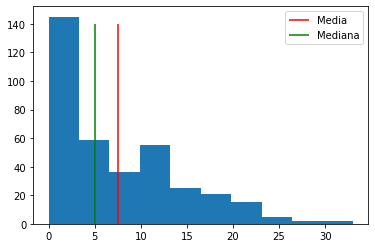

La media de las ventas totales es: 7.482191780821918


In [60]:
import math
#Juntamos los dos arrays en uno solo
d_temp = np.concatenate((df_week.values,df_weekend.values))

mediana_d_temp = np.median(d_temp)
media_d_temp = np.mean(d_temp)

print(media_d_temp)

k = math.ceil(math.log2(len(d_temp))) + 1 #sacamos k con funcion techo sobre logaritmo en base 2 de N + 1
plt.hist(d_temp, bins=k, density=False) #frecuenca relativa
plt.vlines(np.mean(d_temp), 0, 140, label="Media", colors='r')
plt.vlines(np.median(d_temp), 0, 140, label="Mediana", colors='g')
plt.legend()
plt.show()

media_calculada_d_temp = ((media_week) * len(df_week.values) + (media_weekend) * len(df_weekend.values))/len(d_temp)
print("La media de las ventas totales es: " +str(media_calculada_d_temp))


Mirando el histograma, podemos notar que las medidas de tendencia cental no se mantuvieron con respecto a las calculadas en incisos anteriores. De los nuevos valores de medidas de tendencia central, el único que se puede calcular con los datos anteriormente calculados es el de la media. Para poder obtener la media muestral de $D_{temp}$ a través de la media muestral de $D_{sem}$ y $D_{fin}$, se deben tener también la cantidad de días de ventas de los días de semana y de los fines de semana, para así hacer el proceso inverso al calcular la media muestral de cada una, multiplicando la cantidad de dias por su respectiva media muestral, lo que daría la cantidad de zapatillas vendidas en total, para luego dividirla por la cantidad de días de la unión de las dos muestras, es decir, el año completo.

__[Link de video explicativo](https://drive.google.com/open?id=1-7xGPnldhrOarftP7GuUYBz1CPLjO3Kn)__